In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
from imblearn.over_sampling import SMOTE

In [2]:
df=pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [4]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [6]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [7]:
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [8]:
df['gender']=df['gender'].map({'Female': 0,'Male': 1,'Other': 2})
df['smoking_history']=df['smoking_history'].map({'never': 0,'No Info': 1,'current': 2,'former': 3,'ever': 4,'not current': 5})

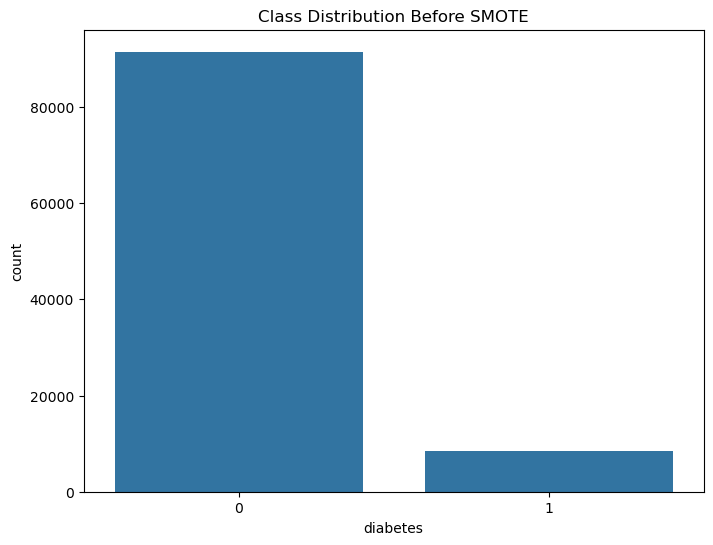

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df['diabetes'])
plt.title('Class Distribution Before SMOTE')
plt.show()

In [10]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [14]:
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

In [15]:
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train_resampled, y_train_resampled)
    y_pred = clf.predict(X_test_scaled)
    y_pred_proba = clf.predict_proba(X_test_scaled)[:, 1]

    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred),
        'Confusion Matrix': confusion_matrix(y_test, y_pred),
        'ROC AUC': auc(roc_curve(y_test, y_pred_proba)[0], roc_curve(y_test, y_pred_proba)[1])
    }

In [16]:
for name, metrics in results.items():
    print(f"\n{name} Results:")
    print(classification_report(y_test, classifiers[name].predict(X_test_scaled)))
    print(f"ROC AUC: {metrics['ROC AUC']:.4f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")


Random Forest Results:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18292
           1       0.76      0.75      0.75      1708

    accuracy                           0.96     20000
   macro avg       0.87      0.86      0.87     20000
weighted avg       0.96      0.96      0.96     20000

ROC AUC: 0.9667
Confusion Matrix:
[[17890   402]
 [  431  1277]]

SVM Results:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     18292
           1       0.42      0.92      0.58      1708

    accuracy                           0.88     20000
   macro avg       0.71      0.90      0.75     20000
weighted avg       0.94      0.88      0.90     20000

ROC AUC: 0.9673
Confusion Matrix:
[[16126  2166]
 [  144  1564]]

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     18292
           1       0.42      0.88      

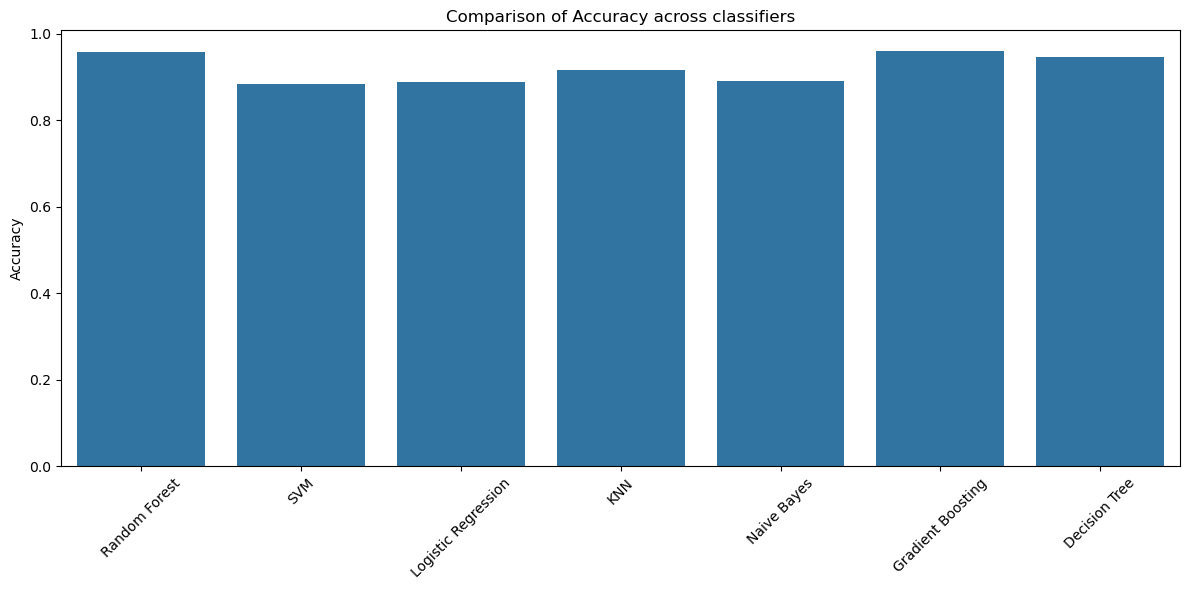

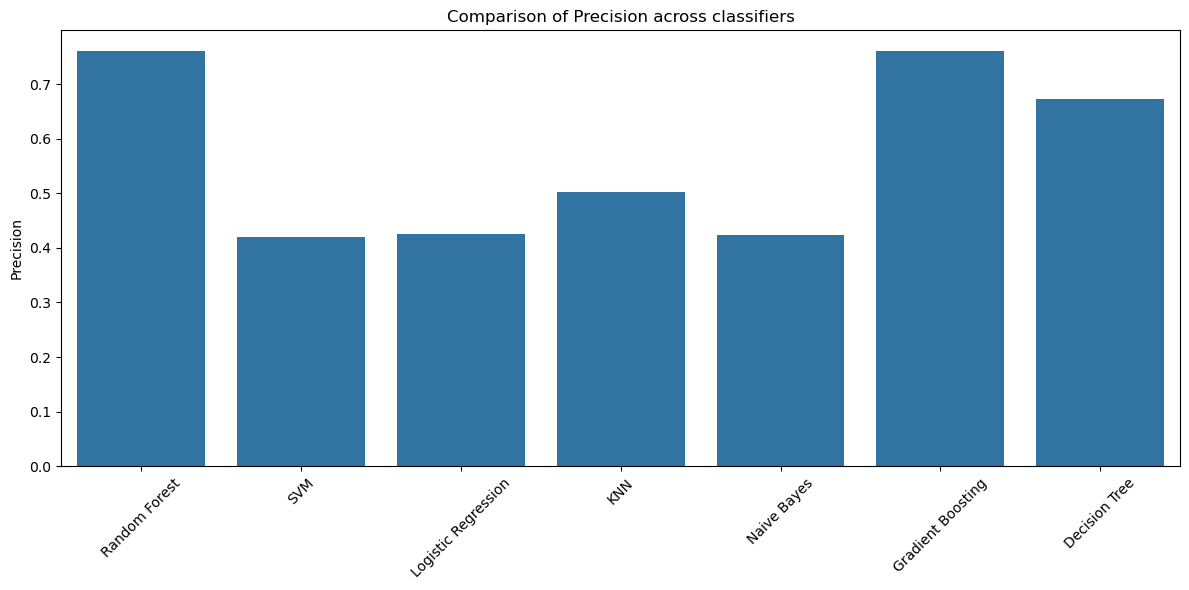

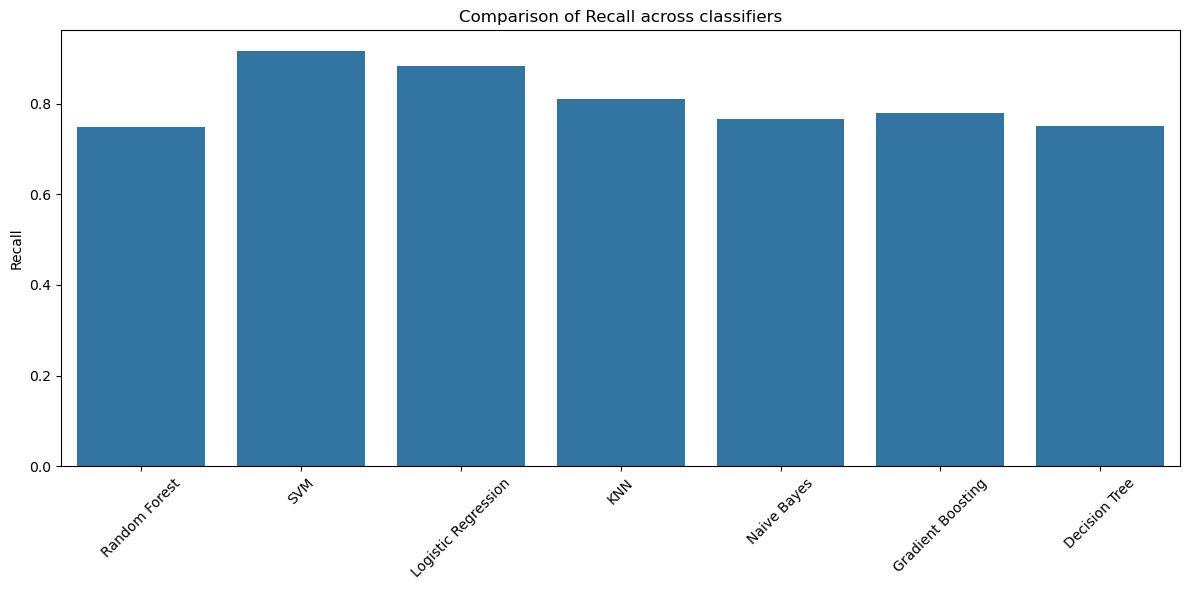

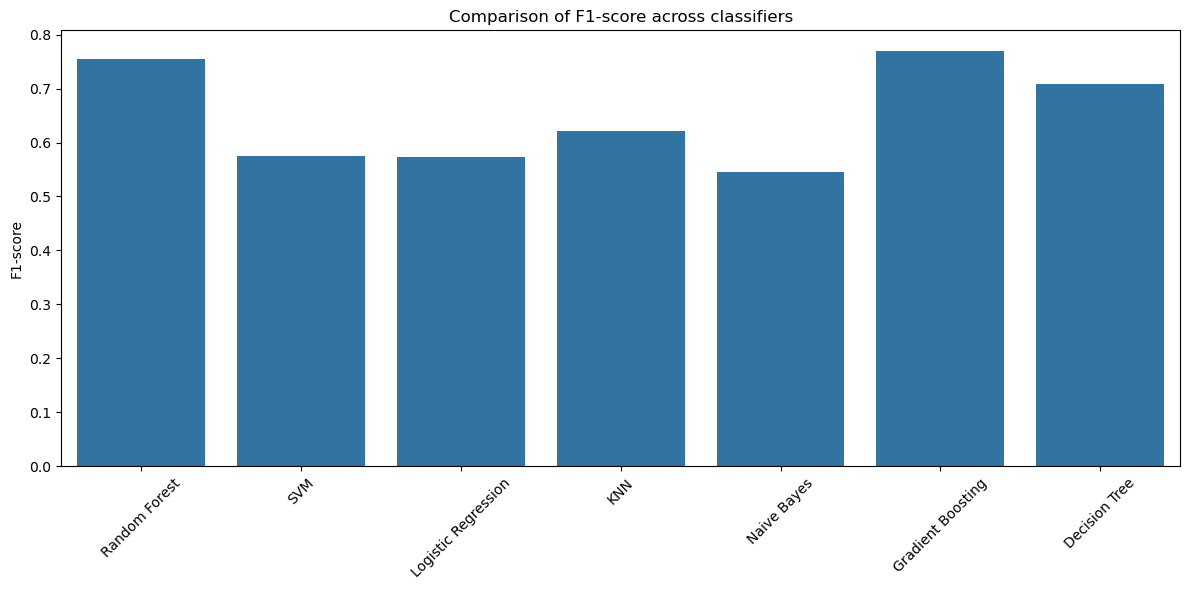

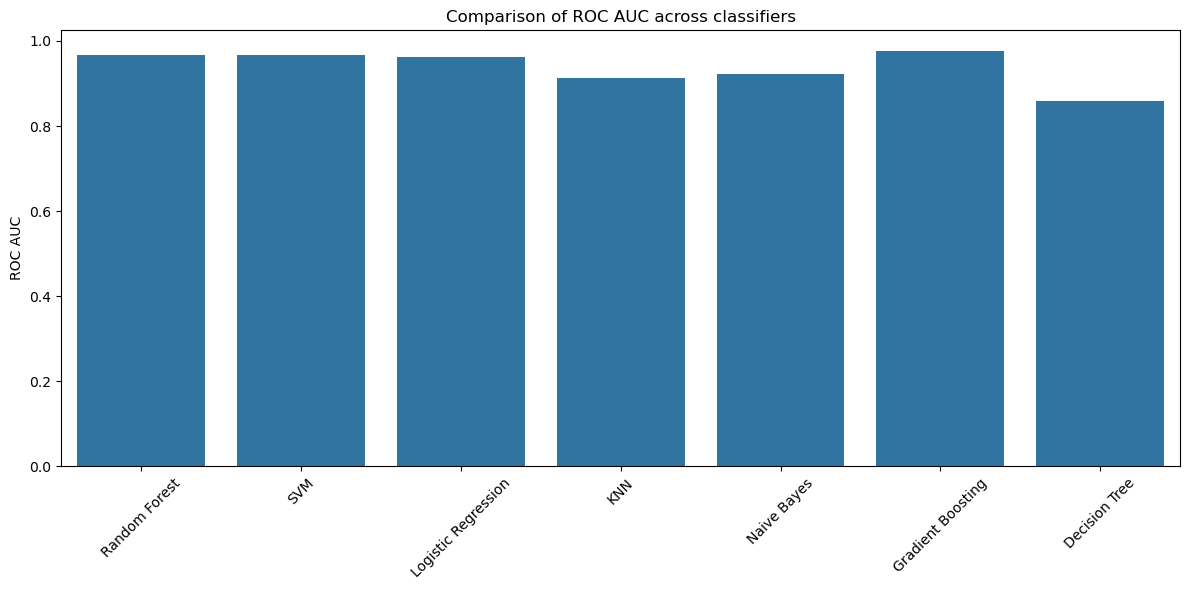

In [17]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC']
for metric in metrics:
    plt.figure(figsize=(12, 6))
    values = [results[clf][metric] for clf in classifiers]
    sns.barplot(x=list(classifiers.keys()), y=values)
    plt.title(f'Comparison of {metric} across classifiers')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

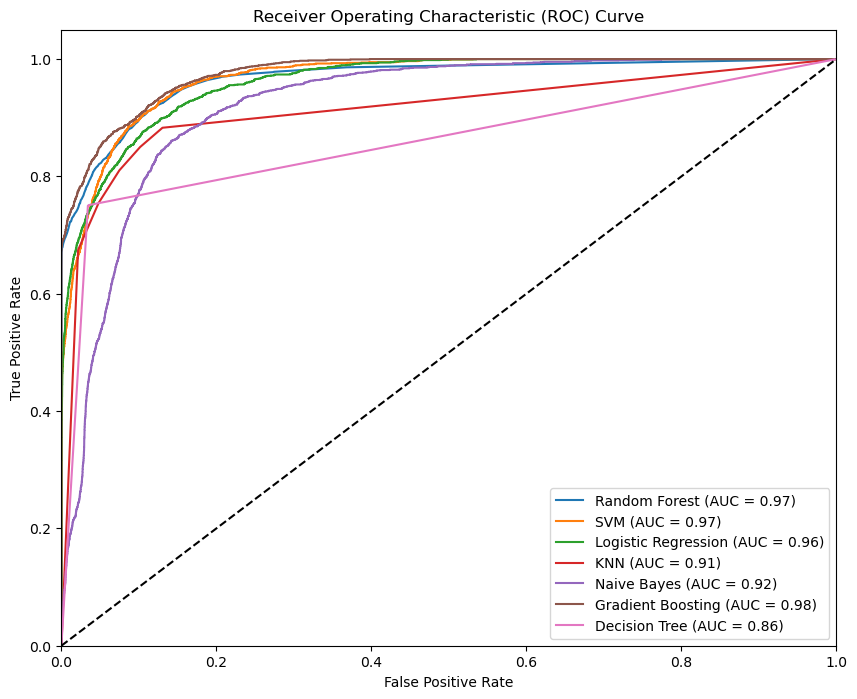

In [18]:
plt.figure(figsize=(10, 8))
for name, clf in classifiers.items():
    y_pred_proba = clf.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

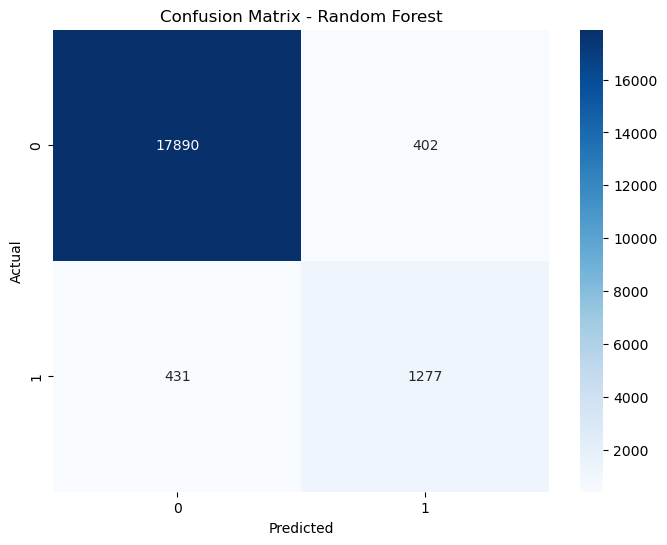

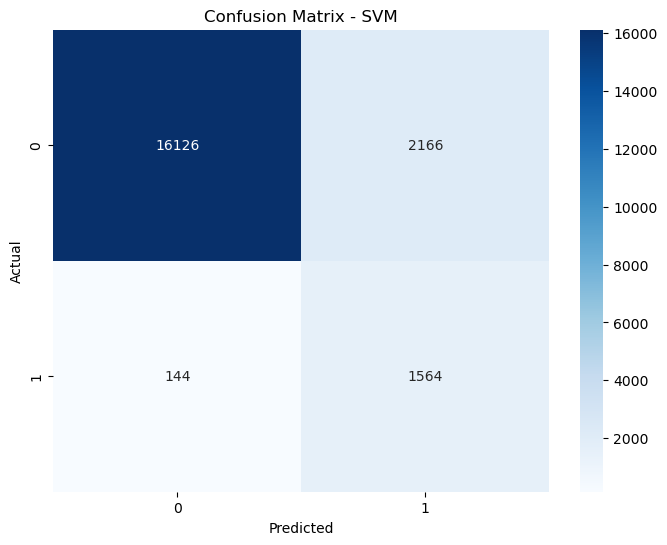

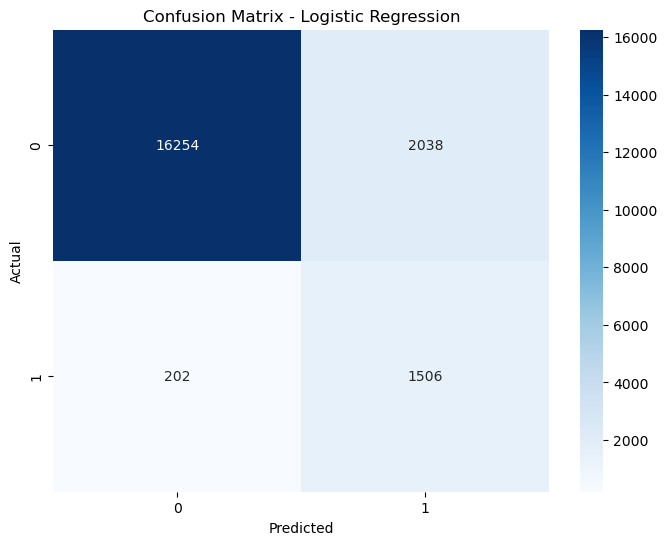

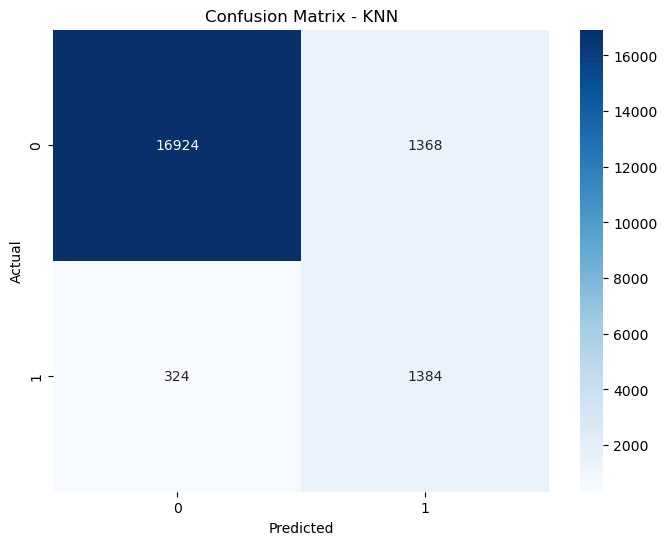

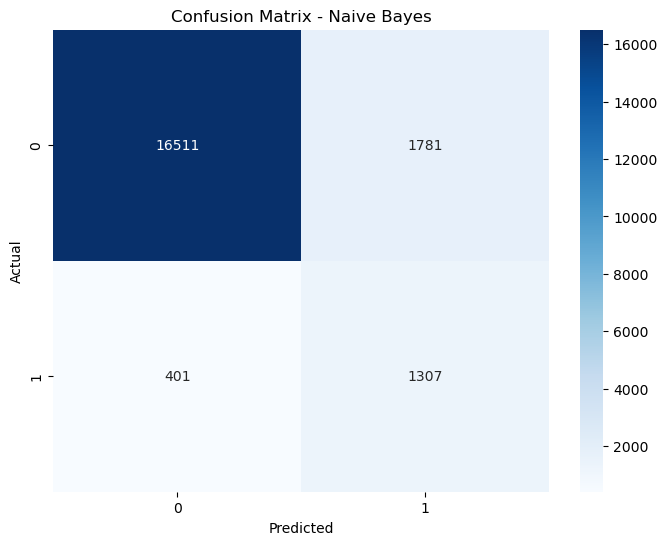

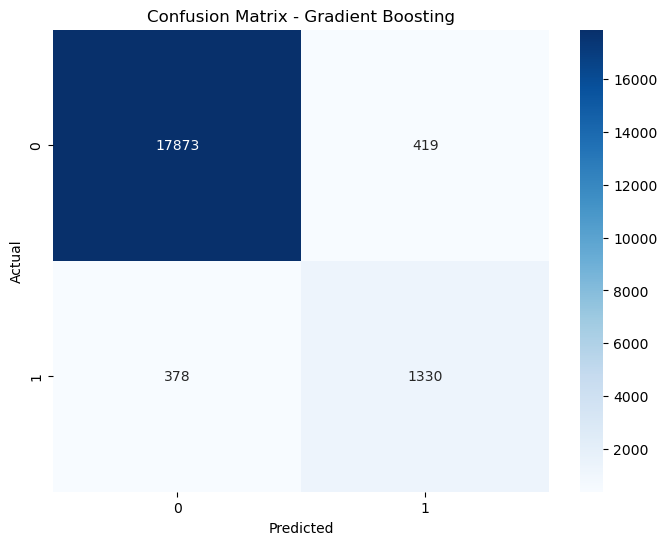

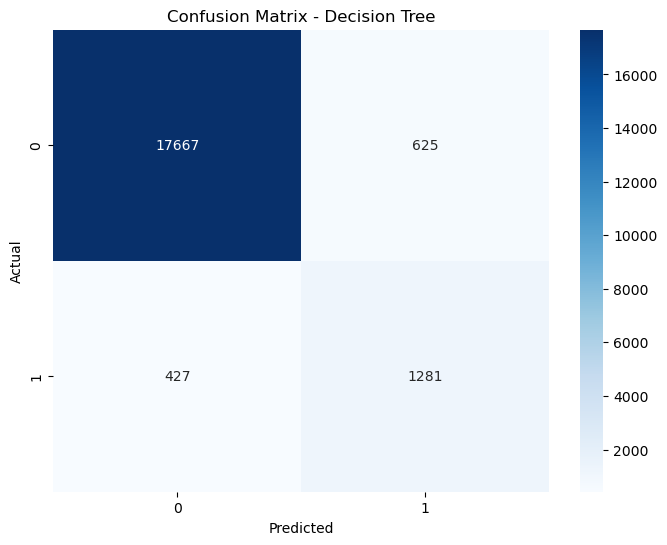

In [19]:
for name, metrics in results.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(metrics['Confusion Matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

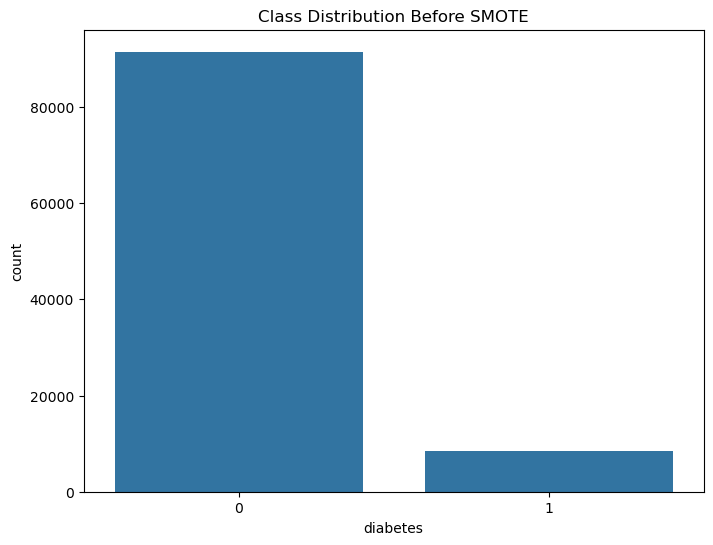

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='diabetes', data=df)
plt.title('Class Distribution Before SMOTE')
plt.show()

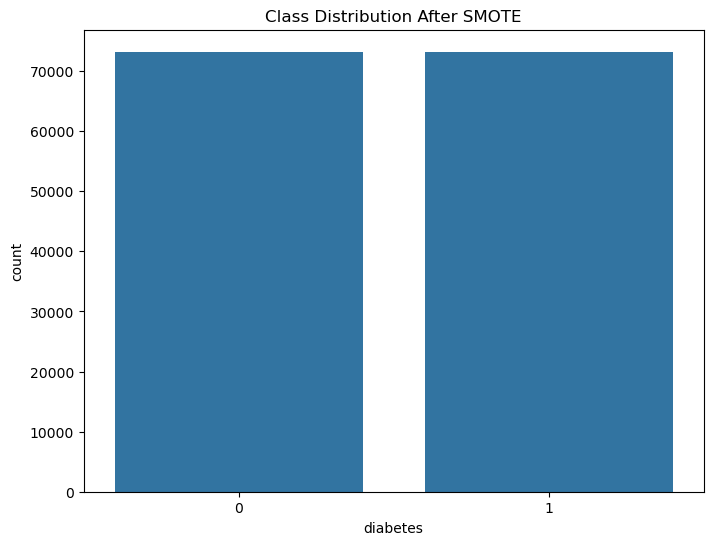

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution After SMOTE')
plt.show()

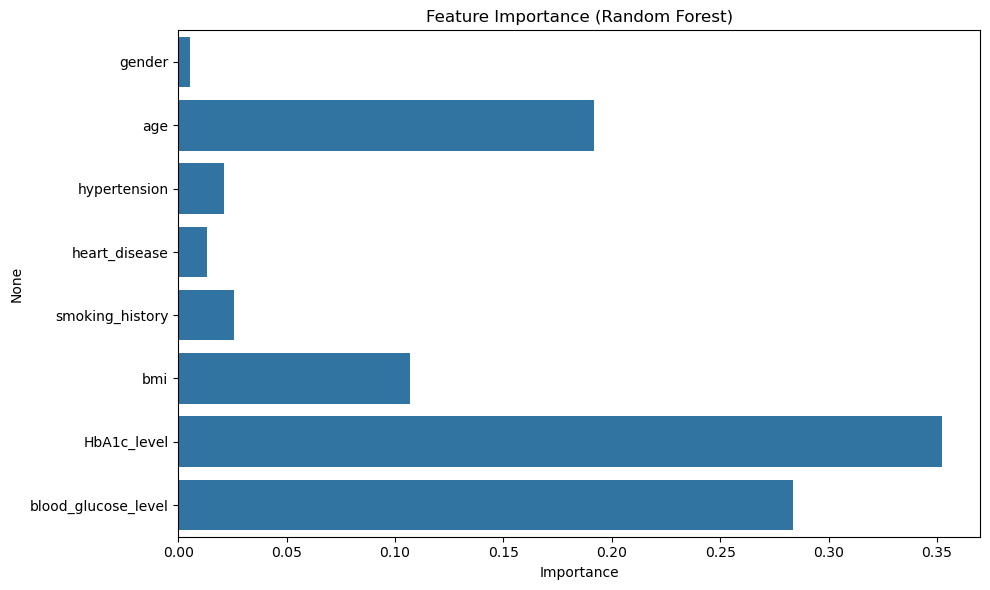

In [22]:
rf_classifier = classifiers['Random Forest']
feature_importance = rf_classifier.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()